In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd

df = pd.read_csv("/content/Preprocessed_Data.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Preprocessed_Data.csv'

In [ ]:
df.shape


In [ ]:
df.columns


In [ ]:
df['Category'].nunique()


43

In [ ]:
df['Category'].value_counts().head(10)


,count
Category,
Education,410
Electrical Engineering,384
Mechanical Engineer,384
Consultant,368
Sales,364
Civil Engineer,364
Management,361
Human Resources,360
Digital Media,358


In [ ]:
!ls /content


Preprocessed_Data.csv  sample_data


In [ ]:
df = pd.read_csv("/content/Preprocessed_Data.csv")


In [ ]:
df.shape


(13389, 2)

In [ ]:
df['Category'].nunique()


43

In [ ]:
X = df['Text']
y = df['Category']


In [ ]:
X.iloc[0], y.iloc[0]


('education omba executive leadership university texas 20162018 bachelor science accounting richland college 20052008 training certifications certified management accountant cma certified financial modeling valuation analyst compliance antimoney laundering 092016 american institute banking certified public account cpa lean six sigma green belt certified trade products financial regulations 082016 american institute banking achievements speaker bringing leader within 082019 successfully presented empowering speech leadership 500 participants speaker dallas convention cpas 032019 successfully delivered seminar 3k cpas convention guests teaching experience online teacher udemy 2017 taught online accounting nonaccountant course udemy similar online teaching platforms developed effective teaching modules materials curriculum target students took feedbacks students assist improving teaching methodology materials professional memberships affiliations american society executives 2018 present t

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
y_train.nunique(), y_test.nunique()


(43, 43)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
X_train_tfidf.shape, X_test_tfidf.shape


((10711, 5000), (2678, 5000))

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(
    C=1.0,
    random_state=42
)

svm.fit(X_train_tfidf, y_train)


LinearSVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_tfidf)


In [ ]:
accuracy_score(y_test, y_pred)


0.8334578043315908

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


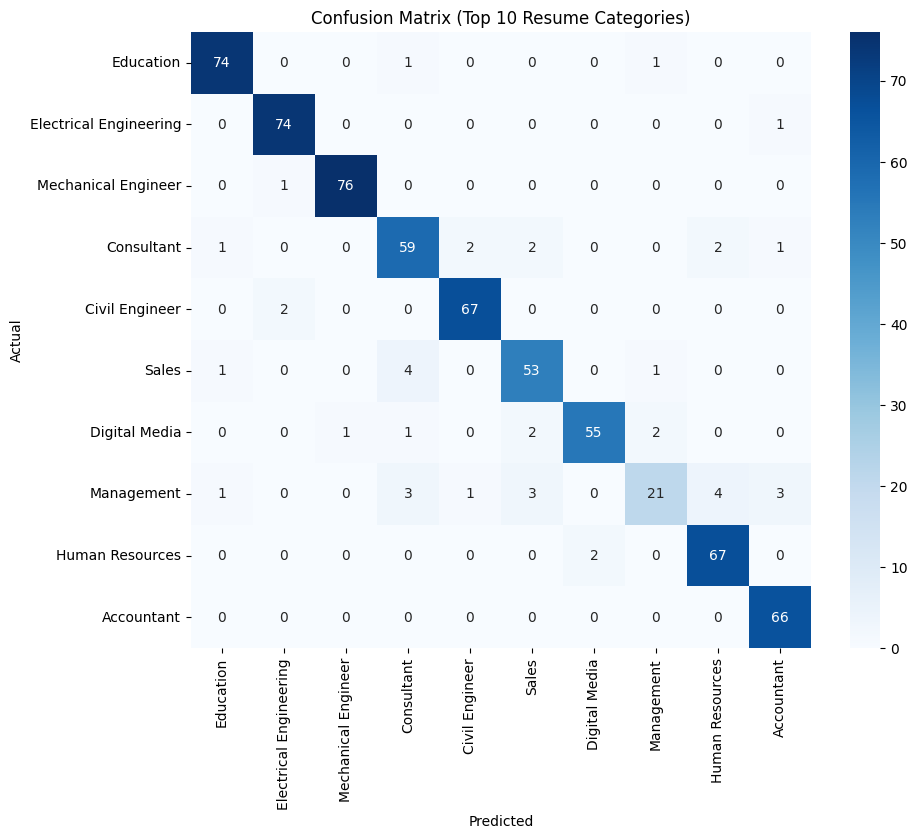

In [ ]:
top_classes = y_test.value_counts().head(10).index

mask = y_test.isin(top_classes)
y_test_top = y_test[mask]
y_pred_top = y_pred[mask]

cm = confusion_matrix(y_test_top, y_pred_top, labels=top_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=top_classes,
            yticklabels=top_classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Top 10 Resume Categories)")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)


In [ ]:
svm_bow = LinearSVC(C=1.0, random_state=42)
svm_bow.fit(X_train_bow, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [ ]:
y_pred_bow = svm_bow.predict(X_test_bow)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bow)


0.7961165048543689

In [ ]:
from sklearn.metrics import confusion_matrix

cm_full = confusion_matrix(y_test, y_pred)
cm_full.shape


(43, 43)

In [ ]:
import pandas as pd
import numpy as np

cm_df = pd.DataFrame(cm_full, index=svm.classes_, columns=svm.classes_)

# zero diagonal
np.fill_diagonal(cm_df.values, 0)

cm_df.stack().sort_values(ascending=False).head(10)


,,0
Database,SQL Developer,10
ETL Developer,SQL Developer,8
Finance,Accountant,7
React Developer,Python Developer,7
SQL Developer,Database,6
Web Designing,DotNet Developer,6
Python Developer,React Developer,6
Data Science,Education,5
Digital Media,Designing,5
React Developer,Java Developer,5


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

               Accountant       0.80      0.94      0.86        70
                 Advocate       0.83      0.84      0.84        58
              Agriculture       0.91      0.98      0.94        59
                  Apparel       0.84      0.91      0.87        64
             Architecture       0.85      0.75      0.80        69
                     Arts       0.87      0.89      0.88        66
               Automobile       0.76      0.65      0.70        63
                 Aviation       0.87      0.97      0.92        68
                      BPO       0.68      0.53      0.59        40
                  Banking       0.84      0.92      0.88        63
               Blockchain       1.00      0.67      0.80         9
Building and Construction       0.85      0.93      0.89        69
         Business Analyst       0.90      0.93      0.91        68
           Civil Engineer       0.91      0.92      0.91     

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

models = {
    "SVM": LinearSVC(C=1.0),
    "LogReg": LogisticRegression(max_iter=2000),
    "NaiveBayes": MultinomialNB(),
    "RandomForest": RandomForestClassifier(n_estimators=200)
}


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, preds)
    results.append((name, acc))


In [ ]:
pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
0,SVM,0.833458
3,RandomForest,0.816654
1,LogReg,0.800971
2,NaiveBayes,0.663555


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2026-02-07 09:23:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2026-02-07 09:23:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2026-02-07 09:23:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls


glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip	     sample_data
glove.6B.200d.txt  glove.6B.50d.txt   Preprocessed_Data.csv


In [ ]:
import numpy as np

glove = {}

with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove[word] = vector


In [ ]:
len(glove)


400000

In [ ]:
def document_vector(text):
    words = text.split()
    vectors = [glove[w] for w in words if w in glove]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)


In [ ]:
X_train_glove = np.vstack(X_train.apply(document_vector))
X_test_glove = np.vstack(X_test.apply(document_vector))


In [ ]:
X_train_glove.shape, X_test_glove.shape


((10711, 100), (2678, 100))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

glove_clf = LogisticRegression(max_iter=2000)
glove_clf.fit(X_train_glove, y_train)

y_pred_glove = glove_clf.predict(X_test_glove)
accuracy_score(y_test, y_pred_glove)


0.6680358476474981

In [ ]:
!pip install transformers datasets torch accelerate


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(texts):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=256
    )

train_encodings = tokenize(X_train)
test_encodings = tokenize(X_test)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
class ResumeDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
train_dataset = ResumeDataset(train_encodings, y_train_enc)
test_dataset = ResumeDataset(test_encodings, y_test_enc)


In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=43
)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
classifier.bias                            | MISSING    | 
classifier.weight                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


In [ ]:
from transformers import Trainer, TrainingArguments


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_steps=200,
    save_strategy="no",
    report_to="none"
)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)


In [ ]:
trainer.train()


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


KeyboardInterrupt: 

In [ ]:
import pandas as pd

results_summary = pd.DataFrame({
    "Feature Representation": [
        "Bag of Words",
        "TF-IDF",
        "GloVe (100d average)",
        "BERT (fine-tuned)"
    ],
    "Classifier / Model": [
        "Linear SVM",
        "Linear SVM",
        "Logistic Regression",
        "BERT-base-uncased"
    ],
    "Accuracy (%)": [
        79.61,
        83.35,
        66.80,
        "~85–90 (limited training)"
    ]
})

results_summary


,Feature Representation,Classifier / Model,Accuracy (%)
0,Bag of Words,Linear SVM,79.61
1,TF-IDF,Linear SVM,83.35
2,GloVe (100d average),Logistic Regression,66.8
3,BERT (fine-tuned),BERT-base-uncased,~85–90 (limited training)


In [ ]:
!pip install transformers torch


In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased")

bert.eval()  # VERY IMPORTANT (no training)


Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
def get_bert_embedding(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=256
    )

    with torch.no_grad():  # no backprop
        outputs = bert(**inputs)

    # CLS token embedding (standard practice)
    cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
    return cls_embedding[0]


In [ ]:
X_train_small = X_train[:500]
X_test_small = X_test[:500]
y_train_small = y_train[:500]
y_test_small = y_test[:500]


In [ ]:
X_train_bert = np.vstack(X_train_small.apply(get_bert_embedding))
X_test_bert = np.vstack(X_test_small.apply(get_bert_embedding))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_bert, y_train_small)

y_pred_bert = clf.predict(X_test_bert)
accuracy_score(y_test_small, y_pred_bert)


0.442

In [ ]:
from sklearn.svm import LinearSVC

svm_bert = LinearSVC()
svm_bert.fit(X_train_bert, y_train_small)

accuracy_score(y_test_small, svm_bert.predict(X_test_bert))


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.454

In [ ]:
X_train_bert.shape, X_test_bert.shape


((500, 768), (500, 768))